In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load Data

In [3]:
dfTrain = pd.read_csv("mnist_fashion_train.csv")
dfTest = pd.read_csv("mnist_fashion_test.csv")

dfTrain.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfTrain.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


# Defining target and features

In [ ]:
y = dfTrain["label"].ravel()
X = scale(dfTrain.drop(['label'], axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

# Example Plotting 

Handwriting 				 Label
AxesImage(shape=(28, 28)) 		 9


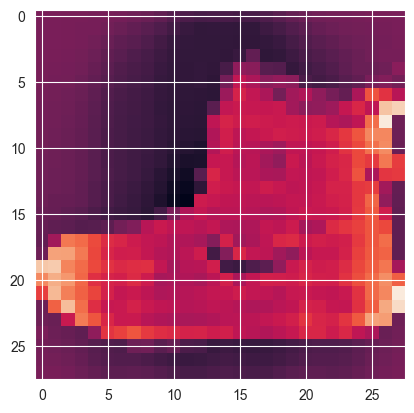

In [6]:
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

# Using SVM to predict the clothes type

In [8]:
from sklearn.svm import SVC

mdlSvmClothes = SVC()
mdlSvmClothes.fit(X_train, y_train)
y_test_pred = mdlSvmClothes.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1166
           1       0.99      0.98      0.98      1213
           2       0.83      0.81      0.82      1232
           3       0.88      0.90      0.89      1209
           4       0.80      0.85      0.83      1159
           5       0.97      0.95      0.96      1217
           6       0.74      0.66      0.70      1178
           7       0.93      0.96      0.95      1215
           8       0.95      0.97      0.96      1178
           9       0.96      0.94      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000


This classification took 11 minutes for 10 different elements.

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

# Neural Network

In [9]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncDgt = MLPClassifier()
mdlNncDgt.fit(X_train, y_train)
y_test_pred = mdlNncDgt.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1166
           1       0.99      0.98      0.98      1213
           2       0.80      0.82      0.81      1232
           3       0.88      0.88      0.88      1209
           4       0.79      0.83      0.81      1159
           5       0.96      0.95      0.96      1217
           6       0.77      0.66      0.71      1178
           7       0.94      0.94      0.94      1215
           8       0.97      0.96      0.96      1178
           9       0.94      0.96      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.88     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: total: 1min 29s
Wall time: 2min 7s


# Now we can test our model with completely not seen data "mnist_fashion_train.csv"

In [10]:
y = dfTest["label"].ravel()
X = scale(dfTest.drop(['label'], axis=1))
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

y_test_pred_new = mdlNncDgt.predict(X)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y, y_test_pred_new))

C:\Users\90543\AppData\Local\Temp\ipykernel_19256\3871678020.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = dfTest["label"].ravel()


Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.81      0.79      1000
           3       0.87      0.88      0.88      1000
           4       0.80      0.80      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.95      0.94      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000


# Deep Neural Network

In [11]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1166
           1       0.98      0.98      0.98      1213
           2       0.82      0.82      0.82      1232
           3       0.91      0.87      0.89      1209
           4       0.79      0.85      0.82      1159
           5       0.95      0.96      0.96      1217
           6       0.73      0.69      0.71      1178
           7       0.96      0.92      0.94      1215
           8       0.97      0.97      0.97      1178
           9       0.93      0.96      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: total: 43.2 s
Wall time: 1min 12s
